<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt

m = 10 # num of samples
a = 2
b = 3
std = 2

np.random.seed(1025)
x = np.linspace(-5,5,m)
y_hat = a*x + b
n = np.zeros_like(y_hat)

In [187]:
y_hat

array([-7.        , -4.77777778, -2.55555556, -0.33333333,  1.88888889,
        4.11111111,  6.33333333,  8.55555556, 10.77777778, 13.        ])

In [188]:
n

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [189]:
for i in range(m):
  n[i] = np.random.normal(0, std)
n

array([ 3.24769378,  2.87594092, -0.68878105, -4.17107052,  1.55951033,
       -2.59041868, -0.54752181, -1.14674617,  0.99679787,  0.97760185])

In [190]:
y = y_hat + n
y

array([-3.75230622, -1.90183686, -3.2443366 , -4.50440385,  3.44839921,
        1.52069243,  5.78581152,  7.40880939, 11.77457565, 13.97760185])

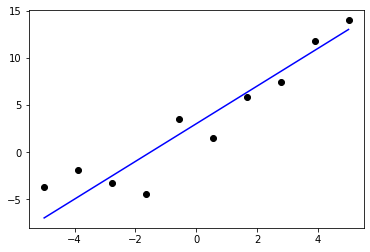

In [191]:
plt.plot(x, y_hat, c='b')
plt.scatter(x, y, c='k')
plt.show()

In [0]:
# linear regression #

In [0]:
theta0 = 0.0 # initialization
theta1 = 0.0
itr = 100 # step_size
lr = 0.01 # learning_rate

In [195]:
print(f'x {x}')
print(f'y {y}')

x [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]
y [-3.75230622 -1.90183686 -3.2443366  -4.50440385  3.44839921  1.52069243
  5.78581152  7.40880939 11.77457565 13.97760185]


In [0]:
def gradient0(x, y, num, theta0, theta1):
  h = theta0*x + theta1
  diff = np.zeros(10, dtype='float')
  result = 0.0
  # print(diff)
  # print(h)
  # print(y)
  diff = h - y
  # print(diff)
  for i in range(num):
    result += diff[i]
  # print(result)
  result /= num
  return result

In [0]:
def gradient1(x, y, num, theta0, theta1):
  h = theta0*x + theta1
  diff = np.zeros(10, dtype='float')
  result = 0.0
  # print(diff)
  # print(h)
  # print(y)
  diff = h - y
  # print(diff)
  # print(x)
  diff *= x
  # print(diff)
  for i in range(num):
    result += diff[i]
  # print(result)
  result /= num
  return result

In [198]:
test = gradient0(x, y, m, theta0, theta1)
test

theta0 0.0
theta1 0.0


In [199]:
test1 = gradient1(x, y, m, theta0, theta1)
test1

theta0 0.0
theta1 0.0


In [0]:
def ObjFnc(x, y, a, b, num): # L2-norm between h(x) and y
  total = 0
  arr1 = a*x+b # h(x) = ax+b
  arr2 = y
  diff = np.zeros_like(arr1)
  # print(f'arr1 {arr1}')
  # print(f'arr2 {arr2}')
  # print(f'diff {diff}')
  diff = arr1 - arr2
  # print(diff)
  two = np.full(10, 2)
  # print(f'sqr {two}')
  sqr = np.power(diff, two)
  # print(f'after sqr {sqr}')
  for i in range(num):
    total += sqr[i]
  # print(total)
  result = total/(2*m)
  return result

In [203]:
cost = ObjFnc(x, y, theta0, theta1, m)
cost

16.490446628741967

In [233]:
theta0 = 1.0
theta1 = 1.0
for i in range(itr):
  # print(f'iter {i}')
  # print(f'theta0 {theta0}')
  # print(f'theta1 {theta1}')
  cost_prev = ObjFnc(x, y, theta0, theta1, m)
  # print(f'loss_prev {cost_prev}')
  grad0 = gradient0(x, y, m, theta0, theta1)
  grad1 = gradient1(x, y, m, theta0, theta1)
  temp0 = theta0 - lr*grad0
  temp1 = theta1 - lr*grad1
  # print(f'temp0 {temp0}')
  # print(f'temp1 {temp1}')
  cost_next = ObjFnc(x, y, temp0, temp1, m)
  # print(f'loss_next {cost_next}')
  if(cost_prev < cost_next):
    break
  else:
    theta0 = temp0
    theta1 = temp1

print(f'final_step {i}')
print(f'final_cost {cost_prev}')

final_step 32
final_cost 3.7901703010018486


In [234]:
new_a = theta0
new_b = theta1
print(f'new_a {new_a}')
print(f'new_b {new_b}')
new_y = theta0*x + theta1
print(f'new_y {new_y}')

new_a 1.3073669859106225
new_b 3.0770891822821542
new_y [-3.45974575 -2.00711576 -0.55448578  0.89814421  2.35077419  3.80340417
  5.25603416  6.70866414  8.16129413  9.61392411]


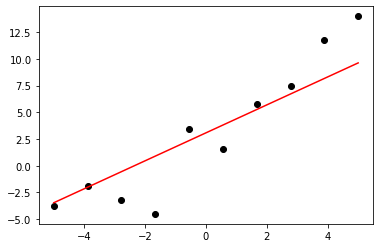

In [235]:
plt.plot(x, new_y, c='r')
plt.scatter(x, y, c='k')
plt.show()